In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import plotly.express as px
import requests
import collections 
from collections import defaultdict
from bs4 import BeautifulSoup
import urllib3
urllib3.disable_warnings()
from urllib3 import request
from urllib.parse import urlparse
plt.style.use("fivethirtyeight")
import seaborn as sn
import urllib.request as urllib2

In [2]:
Sample = pd.read_csv('URL_final.csv')
len(Sample)

FileNotFoundError: [Errno 2] No such file or directory: 'URL_final.csv'

In [2]:
cronos=pd.read_csv("cronos_duration.csv")
legit=pd.read_csv("whoisLegi.csv")
cronos=cronos.drop(columns=['Unnamed: 0'],axis=1)
legit=legit.drop(columns=['Unnamed: 0'],axis=1)
for i in range(len(cronos.duration)):
  cronos.duration[i]=int(cronos.duration[i].split()[0])
for i in range(len(legit.duration)):
  legit.duration[i]=int(legit.duration[i].split()[0])
leg=list(legit.duration)
cro=list(cronos.duration)
leg=sorted(leg)
cro=sorted(cro)

Text(0, 0.5, 'Duration')

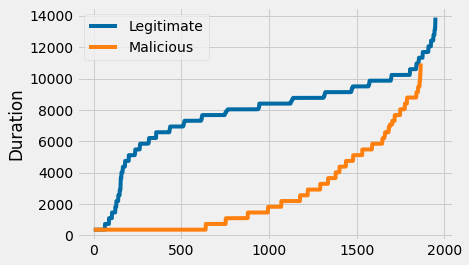

In [3]:
plt.style.use('tableau-colorblind10')
plt.plot(legit.index,leg,label="Legitimate")
plt.plot(cronos.index,cro,label="Malicious")
plt.legend(loc="upper left")
plt.ylabel("Duration")

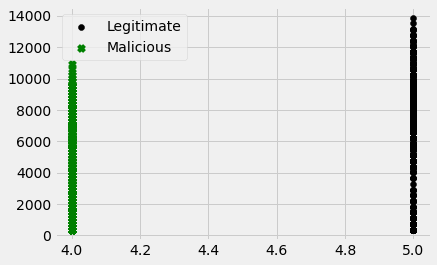

In [4]:
plt.scatter([5]*len(leg),leg,marker="o",color='black',label="Legitimate")
plt.scatter([4]*len(cro),cro,marker="x",color='green',label="Malicious")
plt.legend(loc="best")

In [5]:
import tldextract
TLD = list()
for i in cronos.URL:
    TLD.append(tldextract.extract(i).domain)
https_count = list(TLD[i] for i in range(len(TLD)) if TLD[i] == '=https')
print(len(https_count))

735


In [6]:
import dns
import dns.resolver

In [7]:
X = legit.URL[0]
X = X[11:22]
dns_result_A = dns.resolver.resolve(X, 'A')
#No DNS queries to most of the URLs

In [8]:
import requests
from urllib.parse import urlparse, urljoin
from bs4 import BeautifulSoup
import colorama

In [9]:
colorama.init()
GREEN = colorama.Fore.GREEN
GRAY = colorama.Fore.LIGHTBLACK_EX
RESET = colorama.Fore.RESET
YELLOW = colorama.Fore.YELLOW

In [10]:
internal_urls = set()
external_urls = set()
def is_valid(url):
    """
    Checks whether `url` is a valid URL.
    """
    parsed = urlparse(url)
    return bool(parsed.netloc) and bool(parsed.scheme)

In [11]:
def get_all_website_links(url):
    """
    Returns all URLs that is found on `url` in which it belongs to the same website
    """
    # all URLs of `url`
    urls = set()
    # domain name of the URL without the protocol
    domain_name = urlparse(url).netloc
    soup = BeautifulSoup(requests.get(url).content, "html.parser")
    for a_tag in soup.findAll("a"):
        href = a_tag.attrs.get("href")
        if href == "" or href is None:
            # href empty tag
            continue
        href = urljoin(url, href)
        parsed_href = urlparse(href)
        # remove URL GET parameters, URL fragments, etc.
        href = parsed_href.scheme + "://" + parsed_href.netloc + parsed_href.path
        if not is_valid(href):
            # not a valid URL
            continue
        if href in internal_urls:
            # already in the set
            continue
        if domain_name not in href:
            # external link
            if href not in external_urls:
                print(f"{GRAY}[!] External link: {href}{RESET}")
                external_urls.add(href)
            continue
        print(f"{GREEN}[*] Internal link: {href}{RESET}")
        urls.add(href)
        internal_urls.add(href)
    return urls

In [13]:
total_urls_visited = 0
max_urls = 10

def crawl(url, max_urls):
    """
    Crawls a web page and extracts all links.
    You'll find all links in `external_urls` and `internal_urls` global set variables.
    params:
        max_urls (int): number of max urls to crawl, default is 30.
    """
    global total_urls_visited
    total_urls_visited += 1
    print(f"{YELLOW}[*] Crawling: {url}{RESET}")
    links = get_all_website_links(url)
    for link in links:
        if total_urls_visited > max_urls:
            break
        crawl(link, max_urls=max_urls)

In [15]:
Sample1 = legit.sample(10)
for i in Sample1.URL:
    crawl(i, max_urls)
    print("[+] Total Internal links:", len(internal_urls))
    print("[+] Total External links:", len(external_urls))
    print("[+] Total URLs:", len(external_urls) + len(internal_urls))
    print("[+] Total crawled URLs:", max_urls)

[*] Crawling: http://www.angelfire.com/rock/sick1tabs/
[!] External link: http://two.guestbook.de/gb.cgi
[!] External link: mailto://asc_ben@yahoo.com
[*] Internal link: http://www.angelfire.com/rock/sick1tabs/links.html
[*] Internal link: http://www.angelfire.com/rock/sick1tabs/Deftones.html
[*] Internal link: http://www.angelfire.com/rock/sick1tabs/Godsmack.html
[*] Internal link: http://www.angelfire.com/rock/sick1tabs/Incubus.html
[*] Internal link: http://www.angelfire.com/rock/sick1tabs/Kittie.html
[*] Internal link: http://www.angelfire.com/rock/sick1tabs/KoRn.html
[*] Internal link: http://www.angelfire.com/rock/sick1tabs/LimpBizkit.html
[*] Internal link: http://www.angelfire.com/rock/sick1tabs/PapaRoach.html
[*] Internal link: http://www.angelfire.com/rock/sick1tabs/POD.html
[*] Internal link: http://www.angelfire.com/rock/sick1tabs/RATM.html
[*] Internal link: http://www.angelfire.com/rock/sick1tabs/Slipknot.html
[*] Internal link: http://www.angelfire.com/rock/sick1tabs/Sta